In [1]:
import math
import random as rd
import numpy as np
from scipy.integrate import quad
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 100
theta = 10
xn = [rd.paretovariate(theta) for i in range(N)]
print(xn)

[1.0418128933742603, 1.0862213917007535, 1.226918802090227, 1.0071894065866707, 1.341405998019209, 1.0056604789377763, 1.1385044464660605, 1.3016909229242761, 1.146292058893411, 1.321842929407404, 1.0020637830966865, 1.1347467888196965, 1.0527779605406904, 1.0173458073564385, 1.2863428749380894, 1.0757589164769048, 1.0772144200757057, 1.0079678715771312, 1.0619850836274076, 1.1712306414426694, 1.0195637941732016, 1.0232149521671874, 1.0541880957522303, 1.1942081500148443, 1.2986795437423753, 1.0324046840531973, 1.0172876394472619, 1.0178267823259357, 1.0349580001454741, 1.0081615952040486, 1.02886045775178, 1.0650871350352842, 1.005457625058032, 1.0003466520412483, 1.0624889870978849, 1.0829684886163176, 1.2819595037620848, 1.383940943312911, 1.0350506079248496, 1.0116489870929415, 1.002110921212896, 1.2722359716527967, 1.0401697116186606, 1.1355780395709538, 1.24532140207378, 1.049678067163273, 1.235429813565974, 1.0363486095503538, 1.0328518754419933, 1.260766412873911, 1.10148898877

In [3]:
med = (xn[49] + xn[50])/2

In [19]:
t1, t2 = -1.96, 1.96
theta1 = 1 + N/sum([math.log(xn[i]) for i in range(N)])
border1_asympt = theta1 - t2 * (theta1 - 1)/ (N)**0.5
border2_asympt = theta1 - t1 * (theta1 - 1)/ (N)**0.5
print(f'ОМП: {theta1}\n')
print(f'Асимптотический доверительный интервал:\n\
{border1_asympt} < theta < {border2_asympt}')

ОМП: 11.12132320335672

Асимптотический доверительный интервал:
9.137543855498803 < theta < 13.105102551214637


In [20]:
deltas = []
medas = []
for i in range(1000):
    xn_sub = np.random.choice(xn, N) 
    theta_ = 1 + N/sum([math.log(xn_sub[i]) for i in range(N)]) #омп
    deltas.append(theta_ - theta1)
    med_ = (xn_sub[49] + xn_sub[50])/2
    medas.append(med_ - med)
deltas.sort()
medas.sort()
print(f'Bootstrap доверительный интервал медианы:\n{med - medas[974]} < med < {med - medas[24]}\n')
border1_nonparam = theta1 - deltas[974]
border2_nonparam = theta1 - deltas[24]
print(f'Непараметрический bootstrap доверительный интервал:\n{border1_nonparam} < theta < {border2_nonparam}')

Bootstrap доверительный интервал медианы:
1.0463994507562995 < med < 1.3525270373626181

Непараметрический bootstrap доверительный интервал:
8.932517390380884 < theta < 12.676958372725641


In [21]:
thetas = []
N_boot2=50000
for i in range(N_boot2):
    xn_sub = np.random.choice(xn, N) 
    theta_ast = 1 + N/sum([math.log(xn_sub[i]) for i in range(N)]) 
    thetas.append(theta_ast)

thetas.sort()
k1 = round((1-0.95)/2*N_boot2)
k2 = round((1+0.95)/2*N_boot2)

border1_param = thetas[k1-1]
border2_param = thetas[k2-1]
print(f'Параметрический bootstrap доверительный интервал:\n{border1_param} < theta < {border2_param}\n')

Параметрический bootstrap доверительный интервал:
9.468516530879361 < theta < 13.386889819357139



In [7]:
mult = 1
for i in range(N):
    mult *= xn[i]

def func(th, N, mult):
    return ((1-th)**N)*(math.e*mult)**(-th)

def func_th(th): #для scipy.integrate
    return ((1-th)**N)*(math.e*mult)**(-th)

In [18]:
def find_lim(mlt, prob, c):
    integral = 0
    left = 1
    right = 10e2
    step = 10e-4
    grd = np.arange(left, right, step)
    
    for i in range(len(grd)-1):
        integral += c * step * 0.5 * (func(grd[i], N, mlt)+func(grd[i+1], N, mlt))
        if integral>=prob:
            return grd[i]

    
integ, err = quad(func_th, 1, 1000)   # функция быстро убывает, так что можно интегрировать не до бесконечности

c = 1/integ

border1_bayes = find_lim(mult, 0.025, c)
border2_bayes = find_lim(mult, 0.975, c)

print(f'Байесовский доверительный интервал:\n{border1_bayes} < theta < {border2_bayes}')

Байесовский доверительный интервал:
8.560999999999167 < theta < 12.177999999998768


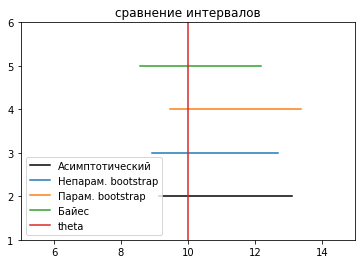

In [28]:
asympt = np.linspace(border1_asympt, border2_asympt, 200)
plt.plot(asympt, 2*np.ones_like(asympt),color='black', label='Асимптотический')

boot = np.linspace(border1_nonparam, border2_nonparam, 200)
plt.plot(boot, 3*np.ones_like(boot), label='Непарам. bootstrap')

precise = np.linspace(border1_param, border2_param, 200)
plt.plot(precise, 4*np.ones_like(precise), label='Парам. bootstrap')

precise = np.linspace(border1_bayes, border2_bayes, 200)
plt.plot(precise, 5*np.ones_like(precise), label='Байес')

plt.plot([theta, theta],[1, 7], label="theta")
plt.xlim(5, 15)
plt.ylim(1, 6)
plt.title("сравнение интервалов")
plt.legend()